# Module 3. Neural Networks and Deep Learning
### Part 1. Machine Learning with TensorFlow
<br><br>
2021. 10. 21.
<br><br>
Youngmin Oh, Ph.D.  
School of Computing  
Gachon University  
<br>

https://sites.google.com/view/youngminoh

# Package Installation
In your terminal,  
> (base) conda activate pylearn  
> (pylearn) conda install numpy  
> (pylearn) conda install matplotlib  
> (pylearn) pip install tensorflow  

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

# 0. Tensor

In [2]:
# python program to calculate 2 + 3
a = 2
b = 3
c = a + b

print("a =", a)
print("b =", b)
print("c = a + b =", c)

a = 2
b = 3
c = a + b = 5


In [3]:
# tensorflow way to calculate 2 + 3
a = tf.constant(2)
b = tf.constant(3)
c = a + b

print("a =", a)
print("b =", b)
print("c = a + b =", c)

a = tf.Tensor(2, shape=(), dtype=int32)
b = tf.Tensor(3, shape=(), dtype=int32)
c = a + b = tf.Tensor(5, shape=(), dtype=int32)


2021-10-12 10:20:23.159937: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# get the only value from "tensor" c
c_value = c.numpy()
print(c_value)

5


In [5]:
# let's do flaot arithmetic
a = tf.constant(2.0)
b = tf.constant(3.0)
c = a + b

print("a =", a)
print("b =", b)
print("c = a + b =", c)

a = tf.Tensor(2.0, shape=(), dtype=float32)
b = tf.Tensor(3.0, shape=(), dtype=float32)
c = a + b = tf.Tensor(5.0, shape=(), dtype=float32)


In [6]:
# in a different way
a = tf.constant(2, dtype=tf.float32)
b = tf.constant(3, dtype=tf.float32)
c = tf.add(a, b) # same as a + b

print("a =", a)
print("b =", b)
print("c = a + b =", c)

a = tf.Tensor(2.0, shape=(), dtype=float32)
b = tf.Tensor(3.0, shape=(), dtype=float32)
c = a + b = tf.Tensor(5.0, shape=(), dtype=float32)


In [7]:
# tensors
tensor_d0 = tf.constant(3.0)
tensor_d1 = tf.constant([2.0, 3.0])
tensor_d2 = tf.constant([[2.0, 3.0, 1.5], [1.0, 2.5, 0.5]])

print("tensor_d0 =", tensor_d0)
print("tensor_d1 =", tensor_d1)
print("tensor_d2 =", tensor_d2)

tensor_d0 = tf.Tensor(3.0, shape=(), dtype=float32)
tensor_d1 = tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tensor_d2 = tf.Tensor(
[[2.  3.  1.5]
 [1.  2.5 0.5]], shape=(2, 3), dtype=float32)


In [8]:
tensor_d3 = tf.constant([[[2.0, 3.0, 1.5], [1.0, 2.5, 0.5]],
                        [[1.0, 7.0, 3.5], [0.0, 3.5, 7.5]]])

print("tensor_d3 =", tensor_d3)

tensor_d3 = tf.Tensor(
[[[2.  3.  1.5]
  [1.  2.5 0.5]]

 [[1.  7.  3.5]
  [0.  3.5 7.5]]], shape=(2, 2, 3), dtype=float32)


In [9]:
print("tensor_d3.shape =", tensor_d3.shape)
print("tensor_d3.dtype =", tensor_d3.dtype)

tensor_d3.shape = (2, 2, 3)
tensor_d3.dtype = <dtype: 'float32'>


In [10]:
print("tensor_d3[0] =", tensor_d3[0])
print("tensor_d3[1] =", tensor_d3[1])

tensor_d3[0] = tf.Tensor(
[[2.  3.  1.5]
 [1.  2.5 0.5]], shape=(2, 3), dtype=float32)
tensor_d3[1] = tf.Tensor(
[[1.  7.  3.5]
 [0.  3.5 7.5]], shape=(2, 3), dtype=float32)


In [11]:
print("tensor_d3[0, 1] =", tensor_d3[0, 1])

tensor_d3[0, 1] = tf.Tensor([1.  2.5 0.5], shape=(3,), dtype=float32)


In [12]:
print("tensor_d3[0, 1, 2] =", tensor_d3[0, 1, 2])

tensor_d3[0, 1, 2] = tf.Tensor(0.5, shape=(), dtype=float32)


In [13]:
# exercise 1: 

# 1. Simple Linear Regression
### 1.1. Analytic Solution

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/968be557dd22b1a2e536b8d22369cfdb37f58703" align=left>

In [14]:
# generate synthetic data
# make a vector that has evenly spaced 100 points between -5 and 5
x = tf.linspace(-5.0, 5.0, 50) 
BETA = 0.5 # true slope
y = BETA * x + tf.random.normal([50])

print("x.shape =", x.shape)
print("y.shape =", y.shape)

x.shape = (50,)
y.shape = (50,)


In [15]:
# initial guess on BETA
b = 0.0 # estimate of BETA
y_pred = b * x
# y_pred = b_hat * x
print("y_pred.shape =", y_pred.shape)

y_pred.shape = (50,)


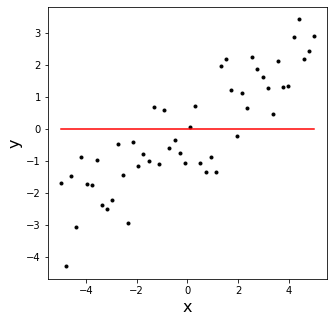

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'k.')
plt.plot(x, y_pred, 'r')
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9caed0f59417a425c988764032e5892130e97fa4" align=left>

In [17]:
# analytic solution
mx = tf.math.reduce_mean(x) # mean of x
my = tf.math.reduce_mean(y) # mean of y
b_hat = tf.reduce_sum((x - mx) * (y - my)) / tf.reduce_sum((x - mx)**2) # analytic estimate of beta
print("b_hat =", b_hat)

b_hat = tf.Tensor(0.5116527, shape=(), dtype=float32)


### 1.2 Gradient Descent Solution

https://en.wikipedia.org/wiki/Gradient_descent  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/700px-Gradient_descent.svg.png" width=40% align=left>  

http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/  
<img src="https://miro.medium.com/max/1200/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" align=left width=50%>

In [18]:
# generate synthetic data
# make a vector that has evenly spaced 50 points between -5 and 5
x = tf.linspace(-5.0, 5.0, 50) 
BETA = 0.5 # true slope
y = BETA * x + tf.random.normal([50])

print("x.shape =", x.shape)
print("y.shape =", y.shape)

x.shape = (50,)
y.shape = (50,)


In [19]:
# initial guess on BETA
b = tf.Variable(0.0)
y_pred = b * x
# y_pred = b_hat * x
print("y_pred.shape =", y_pred.shape)

y_pred.shape = (50,)


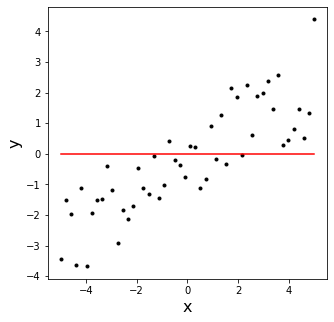

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'k.')
plt.plot(x, y_pred, 'r')
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e" align=left>

In [21]:
# define loss (MSE loss)
loss = tf.reduce_mean((y - y_pred)**2)
print("initial loss = %.3f" % loss)

initial loss = 2.938


Text(0.5, 1.0, 'loss curve')

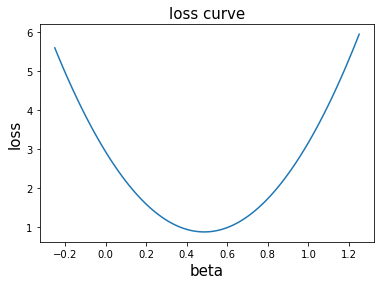

In [22]:
# (optional) let's draw a loss curve
losses = []
bs = tf.linspace(-0.25, 1.25, 100) # candiate beta parameters

for b in bs:
    y_pred = b * x
    loss = tf.reduce_mean((y - y_pred)**2)
    losses.append(loss)
    
plt.figure()
plt.plot(bs, losses)
plt.xlabel("beta", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.title("loss curve", fontsize=15)

### One-step update from gradient descent
(1) predict output   
(2) calculate loss  
(3) calculate gradient  
(4) update the parameter  

In [23]:
# initial guess on BETA
b = tf.Variable(0.0) # b = 0.0, but can change its value
print("b = %.3f" % b)

# one-step update on beta

# for automatic differentiation
with tf.GradientTape() as tape:
    y_pred = b * x  # (1) predict output
    loss = tf.reduce_mean((y - y_pred)**2) # (2) calculate loss
    
db = tape.gradient(loss, b) # (3) calculate gradient: d(loss) / db
print("db = %.3f" % db)

# (4) update the parameter
alpha = 0.01 # learning rate
b = b - alpha * db
print("updated b = %.3f" % b)

b = 0.000
db = -8.441
updated b = 0.084


### Now, repeat update until converges

In [24]:
# initial guess on BETA
b = tf.Variable(0.0) # b = 0.0, but can change its value

# settings
list_b = [b]
list_loss = []
N_UPDATE = 20 # update 20 times
alpha = 0.01 # learningn rate

# training loop
for i in range(N_UPDATE):
    
    # for automatic differentiation
    with tf.GradientTape() as tape:
        y_pred = b * x  # (1) predict output
        loss = tf.reduce_mean((y - y_pred)**2) # (2) calculate loss

    db = tape.gradient(loss, b) # (3) calculate gradient: d(loss) / db
    b.assign_add(-alpha * db) # (4) update parameter
    
    list_b.append(b)
    list_loss.append(loss)
    
    print("iteration %d: b = %.3f, loss = %.3f" % (i+1, b, loss))


iteration 1: b = 0.084, loss = 2.938
iteration 2: b = 0.154, loss = 2.288
iteration 3: b = 0.212, loss = 1.843
iteration 4: b = 0.260, loss = 1.539
iteration 5: b = 0.299, loss = 1.332
iteration 6: b = 0.331, loss = 1.190
iteration 7: b = 0.358, loss = 1.093
iteration 8: b = 0.381, loss = 1.027
iteration 9: b = 0.399, loss = 0.982
iteration 10: b = 0.414, loss = 0.951
iteration 11: b = 0.427, loss = 0.930
iteration 12: b = 0.437, loss = 0.916
iteration 13: b = 0.446, loss = 0.906
iteration 14: b = 0.453, loss = 0.899
iteration 15: b = 0.459, loss = 0.895
iteration 16: b = 0.464, loss = 0.891
iteration 17: b = 0.468, loss = 0.889
iteration 18: b = 0.471, loss = 0.888
iteration 19: b = 0.474, loss = 0.887
iteration 20: b = 0.476, loss = 0.886


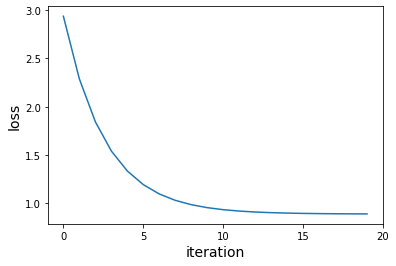

In [25]:
plt.figure()
plt.plot(list_loss)
plt.xticks(np.arange(0, 25, 5))
plt.xlabel("iteration", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.show()

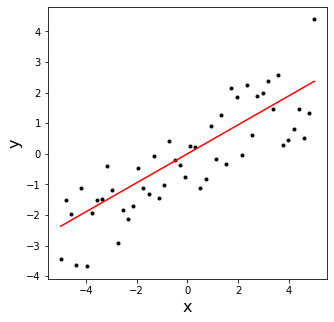

In [26]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'k.')
plt.plot(x, y_pred, 'r')
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

# Practice: Linear Regression with Multiple Parameters

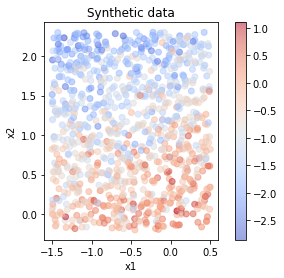

In [27]:
# generate synthetic data
tf.random.set_seed(123)
N = 1000
BETA1 = 0.25
BETA2 = -0.725
BIAS = 0.05

x1 = tf.random.uniform([N], minval=-1.5, maxval=0.5) 
x2 = tf.random.uniform([N], minval=-0.2, maxval=2.3)

y = BETA1 * x1 + BETA2 * x2 + BIAS + 0.5 * tf.random.normal([N])

plt.figure()
plt.scatter(x1, x2, c=y, cmap='coolwarm', alpha=0.5)
plt.axis("scaled")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Synthetic data")
plt.show()

In [28]:
# initial guess on parameters
b1 = tf.Variable(tf.random.normal([1]))# beta1
b2 = tf.Variable(tf.random.normal([1])) # beta2
a = tf.Variable(tf.random.normal([1])) # bias

# model function
def mlinear(x1, x2, b1, b2, a):
    return b1 * x1 + b2 * x2 + a

In [29]:
# sample prediction
y_pred = mlinear(x1, x2, b1, b2, a)
print(y_pred.shape)
print(y[:10])

(1000,)
tf.Tensor(
[-2.0362122  -0.63036615 -2.0170016  -1.5476884  -0.8322623  -0.08223121
 -0.9545053  -1.0825382   0.08627734 -1.7101333 ], shape=(10,), dtype=float32)


In [30]:
# settings
list_loss = []
N_UPDATE = 1000 # update 1000 times
alpha = 0.01 # learningn rate

# training loop
for i in range(N_UPDATE):
    
    # for automatic differentiation
    with tf.GradientTape() as tape:
        y_pred = mlinear(x1, x2, b1, b2, a)  # (1) predict output
        loss = tf.reduce_mean((y - y_pred)**2) # (2) calculate loss

    [db1, db2, da] = tape.gradient(loss, [b1, b2, a]) # (3) calculate gradient
     
    # (4) update parameter
    b1.assign_add(-alpha * db1)
    b2.assign_add(-alpha * db2)
    a.assign_add(-alpha * da)
    
    list_loss.append(loss)
    
    print("iteration %d: loss = %.3f" % (i+1, loss))

iteration 1: loss = 0.662
iteration 2: loss = 0.659
iteration 3: loss = 0.655
iteration 4: loss = 0.652
iteration 5: loss = 0.649
iteration 6: loss = 0.645
iteration 7: loss = 0.642
iteration 8: loss = 0.639
iteration 9: loss = 0.636
iteration 10: loss = 0.633
iteration 11: loss = 0.630
iteration 12: loss = 0.626
iteration 13: loss = 0.623
iteration 14: loss = 0.620
iteration 15: loss = 0.617
iteration 16: loss = 0.614
iteration 17: loss = 0.611
iteration 18: loss = 0.609
iteration 19: loss = 0.606
iteration 20: loss = 0.603
iteration 21: loss = 0.600
iteration 22: loss = 0.597
iteration 23: loss = 0.594
iteration 24: loss = 0.591
iteration 25: loss = 0.589
iteration 26: loss = 0.586
iteration 27: loss = 0.583
iteration 28: loss = 0.581
iteration 29: loss = 0.578
iteration 30: loss = 0.575
iteration 31: loss = 0.573
iteration 32: loss = 0.570
iteration 33: loss = 0.567
iteration 34: loss = 0.565
iteration 35: loss = 0.562
iteration 36: loss = 0.560
iteration 37: loss = 0.557
iteration 

iteration 301: loss = 0.276
iteration 302: loss = 0.276
iteration 303: loss = 0.275
iteration 304: loss = 0.275
iteration 305: loss = 0.275
iteration 306: loss = 0.274
iteration 307: loss = 0.274
iteration 308: loss = 0.274
iteration 309: loss = 0.273
iteration 310: loss = 0.273
iteration 311: loss = 0.273
iteration 312: loss = 0.272
iteration 313: loss = 0.272
iteration 314: loss = 0.272
iteration 315: loss = 0.271
iteration 316: loss = 0.271
iteration 317: loss = 0.271
iteration 318: loss = 0.271
iteration 319: loss = 0.270
iteration 320: loss = 0.270
iteration 321: loss = 0.270
iteration 322: loss = 0.269
iteration 323: loss = 0.269
iteration 324: loss = 0.269
iteration 325: loss = 0.268
iteration 326: loss = 0.268
iteration 327: loss = 0.268
iteration 328: loss = 0.268
iteration 329: loss = 0.267
iteration 330: loss = 0.267
iteration 331: loss = 0.267
iteration 332: loss = 0.266
iteration 333: loss = 0.266
iteration 334: loss = 0.266
iteration 335: loss = 0.266
iteration 336: loss 

iteration 604: loss = 0.232
iteration 605: loss = 0.232
iteration 606: loss = 0.232
iteration 607: loss = 0.232
iteration 608: loss = 0.232
iteration 609: loss = 0.232
iteration 610: loss = 0.232
iteration 611: loss = 0.232
iteration 612: loss = 0.232
iteration 613: loss = 0.232
iteration 614: loss = 0.232
iteration 615: loss = 0.232
iteration 616: loss = 0.232
iteration 617: loss = 0.232
iteration 618: loss = 0.232
iteration 619: loss = 0.232
iteration 620: loss = 0.232
iteration 621: loss = 0.232
iteration 622: loss = 0.232
iteration 623: loss = 0.232
iteration 624: loss = 0.232
iteration 625: loss = 0.231
iteration 626: loss = 0.231
iteration 627: loss = 0.231
iteration 628: loss = 0.231
iteration 629: loss = 0.231
iteration 630: loss = 0.231
iteration 631: loss = 0.231
iteration 632: loss = 0.231
iteration 633: loss = 0.231
iteration 634: loss = 0.231
iteration 635: loss = 0.231
iteration 636: loss = 0.231
iteration 637: loss = 0.231
iteration 638: loss = 0.231
iteration 639: loss 

iteration 906: loss = 0.227
iteration 907: loss = 0.227
iteration 908: loss = 0.227
iteration 909: loss = 0.227
iteration 910: loss = 0.227
iteration 911: loss = 0.227
iteration 912: loss = 0.227
iteration 913: loss = 0.227
iteration 914: loss = 0.227
iteration 915: loss = 0.227
iteration 916: loss = 0.227
iteration 917: loss = 0.227
iteration 918: loss = 0.227
iteration 919: loss = 0.227
iteration 920: loss = 0.227
iteration 921: loss = 0.227
iteration 922: loss = 0.227
iteration 923: loss = 0.227
iteration 924: loss = 0.227
iteration 925: loss = 0.227
iteration 926: loss = 0.227
iteration 927: loss = 0.227
iteration 928: loss = 0.227
iteration 929: loss = 0.227
iteration 930: loss = 0.227
iteration 931: loss = 0.227
iteration 932: loss = 0.227
iteration 933: loss = 0.227
iteration 934: loss = 0.227
iteration 935: loss = 0.227
iteration 936: loss = 0.227
iteration 937: loss = 0.227
iteration 938: loss = 0.227
iteration 939: loss = 0.227
iteration 940: loss = 0.227
iteration 941: loss 

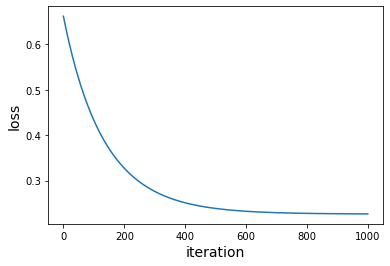

estimated b1 = 0.246 (BETA1 = 0.250)
estimated b2 = -0.703 (BETA2 = -0.725)
estimated a = 0.012 (BIAS = 0.050)


In [31]:
plt.figure()
plt.plot(list_loss)
# plt.xticks(np.arange(0, 25, 5))
plt.xlabel("iteration", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.show()

print("estimated b1 = %.3f (BETA1 = %.3f)" %(b1, BETA1))
print("estimated b2 = %.3f (BETA2 = %.3f)" %(b2, BETA2))
print("estimated a = %.3f (BIAS = %.3f)" %(a, BIAS))

# 2. Logistic Regression, or Binary Classification

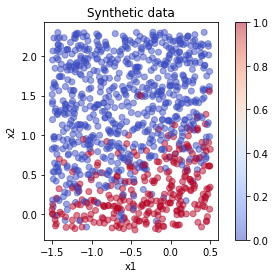

In [32]:
# generate synthetic data
tf.random.set_seed(123)
N = 1000
BETA1 = 0.25
BETA2 = -0.725
BIAS = 0.5

x1 = tf.random.uniform([N], minval=-1.5, maxval=0.5) 
x2 = tf.random.uniform([N], minval=-0.2, maxval=2.3)

y = BETA1 * x1 + BETA2 * x2 + BIAS + 0.25 * tf.random.normal([N])
z = y >= 0 # boolean: True or False
z = tf.cast(z, tf.float32) # conversion to int: 1 or 0

plt.figure()
plt.scatter(x1, x2, c=z, cmap='coolwarm', alpha=0.5)
plt.axis("scaled")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Synthetic data")
plt.show()

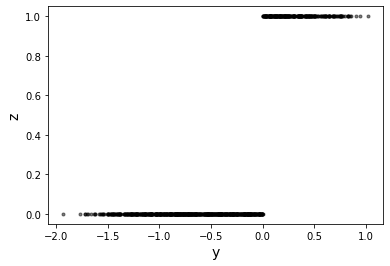

In [33]:
plt.figure()
plt.plot(y, z, 'k.', alpha=0.5)
plt.xlabel("y", fontsize=14)
plt.ylabel("z", fontsize=14)
plt.show()

In [34]:
# initial guess on parameters
b1 = tf.Variable(tf.random.normal([1]))# beta1
b2 = tf.Variable(tf.random.normal([1])) # beta2
a = tf.Variable(tf.random.normal([1])) # bias

# model function
def mlinear(x1, x2, b1, b2, a):
    return b1 * x1 + b2 * x2 + a

# sigmoid function
def sigmoid(y):
    z = 1 / (1 + tf.math.exp(-y))
    return z

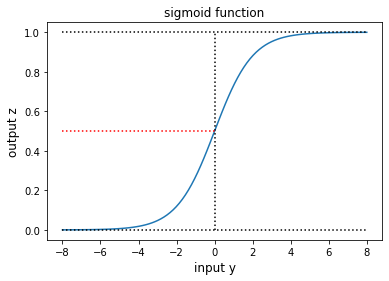

In [35]:
# plot sigmoid function
y_inputs = tf.linspace(-8.0, 8.0, 100)
z_outputs = sigmoid(y_inputs)

plt.figure()
plt.plot(y_inputs, z_outputs)
plt.plot([-8.0, 8.0], [1.0, 1.0], 'k:')
plt.plot([-8.0, 8.0], [0.0, 0.0], 'k:')
plt.plot([0.0, 0.0], [0., 1.0], 'k:')
plt.plot([-8.0, 0.0], [0.5, 0.5], 'r:')
plt.xlabel("input y", fontsize=12)
plt.ylabel("output z", fontsize=12)
plt.title("sigmoid function", fontsize=12)
plt.show()


In [36]:
# sample prediction
y_pred = mlinear(x1, x2, b1, b2, a)
z_pred = sigmoid(y_pred)
print(z_pred[:10])

tf.Tensor(
[0.30518135 0.28638226 0.27487677 0.22603688 0.19343713 0.23863703
 0.27540526 0.24769577 0.28011018 0.35303995], shape=(10,), dtype=float32)


### Binary Cross-Entropy Loss (BCE Loss)
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/80f87a71d3a616a0939f5360cec24d702d2593a2" align=left>

In [37]:
# settings
list_loss = []
N_UPDATE = 5000 # update 10000 times
alpha = 0.05 # learningn rate

# training loop
for i in range(N_UPDATE):
    
    # for automatic differentiation
    with tf.GradientTape() as tape:
        # (1) predict output
        y_pred = mlinear(x1, x2, b1, b2, a)  
        z_pred = sigmoid(y_pred)
        
        # (2) calculate BCE loss
        loss = -tf.reduce_mean(z * tf.math.log(z_pred) + (1 - z) * tf.math.log(1 - z_pred)) 

    # (3) calculate gradient
    [db1, db2, da] = tape.gradient(loss, [b1, b2, a]) 
     
    # (4) update parameter
    b1.assign_add(-alpha * db1)
    b2.assign_add(-alpha * db2)
    a.assign_add(-alpha * da)
    
    list_loss.append(loss)
    
    print("iteration %d: loss = %.3f" % (i+1, loss))

iteration 1: loss = 0.595
iteration 2: loss = 0.593
iteration 3: loss = 0.591
iteration 4: loss = 0.589
iteration 5: loss = 0.588
iteration 6: loss = 0.586
iteration 7: loss = 0.584
iteration 8: loss = 0.583
iteration 9: loss = 0.581
iteration 10: loss = 0.580
iteration 11: loss = 0.579
iteration 12: loss = 0.577
iteration 13: loss = 0.576
iteration 14: loss = 0.574
iteration 15: loss = 0.573
iteration 16: loss = 0.572
iteration 17: loss = 0.570
iteration 18: loss = 0.569
iteration 19: loss = 0.568
iteration 20: loss = 0.567
iteration 21: loss = 0.566
iteration 22: loss = 0.564
iteration 23: loss = 0.563
iteration 24: loss = 0.562
iteration 25: loss = 0.561
iteration 26: loss = 0.560
iteration 27: loss = 0.559
iteration 28: loss = 0.558
iteration 29: loss = 0.557
iteration 30: loss = 0.556
iteration 31: loss = 0.555
iteration 32: loss = 0.554
iteration 33: loss = 0.553
iteration 34: loss = 0.552
iteration 35: loss = 0.551
iteration 36: loss = 0.550
iteration 37: loss = 0.549
iteration 

iteration 323: loss = 0.401
iteration 324: loss = 0.401
iteration 325: loss = 0.401
iteration 326: loss = 0.400
iteration 327: loss = 0.400
iteration 328: loss = 0.400
iteration 329: loss = 0.399
iteration 330: loss = 0.399
iteration 331: loss = 0.399
iteration 332: loss = 0.399
iteration 333: loss = 0.398
iteration 334: loss = 0.398
iteration 335: loss = 0.398
iteration 336: loss = 0.397
iteration 337: loss = 0.397
iteration 338: loss = 0.397
iteration 339: loss = 0.396
iteration 340: loss = 0.396
iteration 341: loss = 0.396
iteration 342: loss = 0.395
iteration 343: loss = 0.395
iteration 344: loss = 0.395
iteration 345: loss = 0.395
iteration 346: loss = 0.394
iteration 347: loss = 0.394
iteration 348: loss = 0.394
iteration 349: loss = 0.393
iteration 350: loss = 0.393
iteration 351: loss = 0.393
iteration 352: loss = 0.393
iteration 353: loss = 0.392
iteration 354: loss = 0.392
iteration 355: loss = 0.392
iteration 356: loss = 0.391
iteration 357: loss = 0.391
iteration 358: loss 

iteration 620: loss = 0.337
iteration 621: loss = 0.337
iteration 622: loss = 0.337
iteration 623: loss = 0.337
iteration 624: loss = 0.337
iteration 625: loss = 0.336
iteration 626: loss = 0.336
iteration 627: loss = 0.336
iteration 628: loss = 0.336
iteration 629: loss = 0.336
iteration 630: loss = 0.336
iteration 631: loss = 0.336
iteration 632: loss = 0.335
iteration 633: loss = 0.335
iteration 634: loss = 0.335
iteration 635: loss = 0.335
iteration 636: loss = 0.335
iteration 637: loss = 0.335
iteration 638: loss = 0.335
iteration 639: loss = 0.334
iteration 640: loss = 0.334
iteration 641: loss = 0.334
iteration 642: loss = 0.334
iteration 643: loss = 0.334
iteration 644: loss = 0.334
iteration 645: loss = 0.334
iteration 646: loss = 0.333
iteration 647: loss = 0.333
iteration 648: loss = 0.333
iteration 649: loss = 0.333
iteration 650: loss = 0.333
iteration 651: loss = 0.333
iteration 652: loss = 0.333
iteration 653: loss = 0.333
iteration 654: loss = 0.332
iteration 655: loss 

iteration 933: loss = 0.304
iteration 934: loss = 0.304
iteration 935: loss = 0.304
iteration 936: loss = 0.304
iteration 937: loss = 0.304
iteration 938: loss = 0.304
iteration 939: loss = 0.304
iteration 940: loss = 0.304
iteration 941: loss = 0.304
iteration 942: loss = 0.304
iteration 943: loss = 0.304
iteration 944: loss = 0.304
iteration 945: loss = 0.304
iteration 946: loss = 0.304
iteration 947: loss = 0.303
iteration 948: loss = 0.303
iteration 949: loss = 0.303
iteration 950: loss = 0.303
iteration 951: loss = 0.303
iteration 952: loss = 0.303
iteration 953: loss = 0.303
iteration 954: loss = 0.303
iteration 955: loss = 0.303
iteration 956: loss = 0.303
iteration 957: loss = 0.303
iteration 958: loss = 0.303
iteration 959: loss = 0.303
iteration 960: loss = 0.303
iteration 961: loss = 0.302
iteration 962: loss = 0.302
iteration 963: loss = 0.302
iteration 964: loss = 0.302
iteration 965: loss = 0.302
iteration 966: loss = 0.302
iteration 967: loss = 0.302
iteration 968: loss 

iteration 1265: loss = 0.286
iteration 1266: loss = 0.286
iteration 1267: loss = 0.286
iteration 1268: loss = 0.286
iteration 1269: loss = 0.286
iteration 1270: loss = 0.286
iteration 1271: loss = 0.286
iteration 1272: loss = 0.286
iteration 1273: loss = 0.285
iteration 1274: loss = 0.285
iteration 1275: loss = 0.285
iteration 1276: loss = 0.285
iteration 1277: loss = 0.285
iteration 1278: loss = 0.285
iteration 1279: loss = 0.285
iteration 1280: loss = 0.285
iteration 1281: loss = 0.285
iteration 1282: loss = 0.285
iteration 1283: loss = 0.285
iteration 1284: loss = 0.285
iteration 1285: loss = 0.285
iteration 1286: loss = 0.285
iteration 1287: loss = 0.285
iteration 1288: loss = 0.285
iteration 1289: loss = 0.285
iteration 1290: loss = 0.285
iteration 1291: loss = 0.285
iteration 1292: loss = 0.285
iteration 1293: loss = 0.285
iteration 1294: loss = 0.285
iteration 1295: loss = 0.285
iteration 1296: loss = 0.285
iteration 1297: loss = 0.285
iteration 1298: loss = 0.284
iteration 1299

iteration 1616: loss = 0.274
iteration 1617: loss = 0.274
iteration 1618: loss = 0.274
iteration 1619: loss = 0.274
iteration 1620: loss = 0.274
iteration 1621: loss = 0.274
iteration 1622: loss = 0.274
iteration 1623: loss = 0.274
iteration 1624: loss = 0.274
iteration 1625: loss = 0.274
iteration 1626: loss = 0.274
iteration 1627: loss = 0.274
iteration 1628: loss = 0.274
iteration 1629: loss = 0.274
iteration 1630: loss = 0.274
iteration 1631: loss = 0.274
iteration 1632: loss = 0.274
iteration 1633: loss = 0.274
iteration 1634: loss = 0.274
iteration 1635: loss = 0.274
iteration 1636: loss = 0.274
iteration 1637: loss = 0.274
iteration 1638: loss = 0.274
iteration 1639: loss = 0.274
iteration 1640: loss = 0.274
iteration 1641: loss = 0.274
iteration 1642: loss = 0.274
iteration 1643: loss = 0.274
iteration 1644: loss = 0.274
iteration 1645: loss = 0.274
iteration 1646: loss = 0.274
iteration 1647: loss = 0.274
iteration 1648: loss = 0.273
iteration 1649: loss = 0.273
iteration 1650

iteration 1982: loss = 0.267
iteration 1983: loss = 0.267
iteration 1984: loss = 0.267
iteration 1985: loss = 0.267
iteration 1986: loss = 0.267
iteration 1987: loss = 0.267
iteration 1988: loss = 0.267
iteration 1989: loss = 0.267
iteration 1990: loss = 0.267
iteration 1991: loss = 0.267
iteration 1992: loss = 0.267
iteration 1993: loss = 0.267
iteration 1994: loss = 0.267
iteration 1995: loss = 0.267
iteration 1996: loss = 0.267
iteration 1997: loss = 0.267
iteration 1998: loss = 0.267
iteration 1999: loss = 0.267
iteration 2000: loss = 0.266
iteration 2001: loss = 0.266
iteration 2002: loss = 0.266
iteration 2003: loss = 0.266
iteration 2004: loss = 0.266
iteration 2005: loss = 0.266
iteration 2006: loss = 0.266
iteration 2007: loss = 0.266
iteration 2008: loss = 0.266
iteration 2009: loss = 0.266
iteration 2010: loss = 0.266
iteration 2011: loss = 0.266
iteration 2012: loss = 0.266
iteration 2013: loss = 0.266
iteration 2014: loss = 0.266
iteration 2015: loss = 0.266
iteration 2016

iteration 2340: loss = 0.262
iteration 2341: loss = 0.262
iteration 2342: loss = 0.262
iteration 2343: loss = 0.262
iteration 2344: loss = 0.262
iteration 2345: loss = 0.262
iteration 2346: loss = 0.262
iteration 2347: loss = 0.262
iteration 2348: loss = 0.262
iteration 2349: loss = 0.262
iteration 2350: loss = 0.262
iteration 2351: loss = 0.262
iteration 2352: loss = 0.262
iteration 2353: loss = 0.262
iteration 2354: loss = 0.262
iteration 2355: loss = 0.262
iteration 2356: loss = 0.262
iteration 2357: loss = 0.262
iteration 2358: loss = 0.262
iteration 2359: loss = 0.262
iteration 2360: loss = 0.262
iteration 2361: loss = 0.262
iteration 2362: loss = 0.262
iteration 2363: loss = 0.262
iteration 2364: loss = 0.262
iteration 2365: loss = 0.262
iteration 2366: loss = 0.262
iteration 2367: loss = 0.262
iteration 2368: loss = 0.262
iteration 2369: loss = 0.262
iteration 2370: loss = 0.262
iteration 2371: loss = 0.262
iteration 2372: loss = 0.262
iteration 2373: loss = 0.262
iteration 2374

iteration 2691: loss = 0.259
iteration 2692: loss = 0.259
iteration 2693: loss = 0.259
iteration 2694: loss = 0.259
iteration 2695: loss = 0.259
iteration 2696: loss = 0.259
iteration 2697: loss = 0.259
iteration 2698: loss = 0.259
iteration 2699: loss = 0.259
iteration 2700: loss = 0.259
iteration 2701: loss = 0.259
iteration 2702: loss = 0.259
iteration 2703: loss = 0.259
iteration 2704: loss = 0.259
iteration 2705: loss = 0.259
iteration 2706: loss = 0.259
iteration 2707: loss = 0.258
iteration 2708: loss = 0.258
iteration 2709: loss = 0.258
iteration 2710: loss = 0.258
iteration 2711: loss = 0.258
iteration 2712: loss = 0.258
iteration 2713: loss = 0.258
iteration 2714: loss = 0.258
iteration 2715: loss = 0.258
iteration 2716: loss = 0.258
iteration 2717: loss = 0.258
iteration 2718: loss = 0.258
iteration 2719: loss = 0.258
iteration 2720: loss = 0.258
iteration 2721: loss = 0.258
iteration 2722: loss = 0.258
iteration 2723: loss = 0.258
iteration 2724: loss = 0.258
iteration 2725

iteration 3053: loss = 0.256
iteration 3054: loss = 0.256
iteration 3055: loss = 0.256
iteration 3056: loss = 0.256
iteration 3057: loss = 0.256
iteration 3058: loss = 0.256
iteration 3059: loss = 0.256
iteration 3060: loss = 0.256
iteration 3061: loss = 0.256
iteration 3062: loss = 0.256
iteration 3063: loss = 0.256
iteration 3064: loss = 0.256
iteration 3065: loss = 0.256
iteration 3066: loss = 0.256
iteration 3067: loss = 0.256
iteration 3068: loss = 0.256
iteration 3069: loss = 0.256
iteration 3070: loss = 0.256
iteration 3071: loss = 0.256
iteration 3072: loss = 0.256
iteration 3073: loss = 0.256
iteration 3074: loss = 0.256
iteration 3075: loss = 0.256
iteration 3076: loss = 0.256
iteration 3077: loss = 0.256
iteration 3078: loss = 0.256
iteration 3079: loss = 0.256
iteration 3080: loss = 0.256
iteration 3081: loss = 0.256
iteration 3082: loss = 0.256
iteration 3083: loss = 0.256
iteration 3084: loss = 0.256
iteration 3085: loss = 0.256
iteration 3086: loss = 0.256
iteration 3087

iteration 3418: loss = 0.254
iteration 3419: loss = 0.254
iteration 3420: loss = 0.254
iteration 3421: loss = 0.254
iteration 3422: loss = 0.254
iteration 3423: loss = 0.254
iteration 3424: loss = 0.254
iteration 3425: loss = 0.254
iteration 3426: loss = 0.254
iteration 3427: loss = 0.254
iteration 3428: loss = 0.254
iteration 3429: loss = 0.254
iteration 3430: loss = 0.254
iteration 3431: loss = 0.254
iteration 3432: loss = 0.254
iteration 3433: loss = 0.254
iteration 3434: loss = 0.254
iteration 3435: loss = 0.254
iteration 3436: loss = 0.254
iteration 3437: loss = 0.254
iteration 3438: loss = 0.254
iteration 3439: loss = 0.254
iteration 3440: loss = 0.254
iteration 3441: loss = 0.254
iteration 3442: loss = 0.254
iteration 3443: loss = 0.254
iteration 3444: loss = 0.254
iteration 3445: loss = 0.254
iteration 3446: loss = 0.254
iteration 3447: loss = 0.254
iteration 3448: loss = 0.254
iteration 3449: loss = 0.254
iteration 3450: loss = 0.254
iteration 3451: loss = 0.254
iteration 3452

iteration 3779: loss = 0.253
iteration 3780: loss = 0.253
iteration 3781: loss = 0.253
iteration 3782: loss = 0.253
iteration 3783: loss = 0.253
iteration 3784: loss = 0.253
iteration 3785: loss = 0.253
iteration 3786: loss = 0.253
iteration 3787: loss = 0.253
iteration 3788: loss = 0.253
iteration 3789: loss = 0.253
iteration 3790: loss = 0.253
iteration 3791: loss = 0.253
iteration 3792: loss = 0.253
iteration 3793: loss = 0.253
iteration 3794: loss = 0.253
iteration 3795: loss = 0.253
iteration 3796: loss = 0.253
iteration 3797: loss = 0.253
iteration 3798: loss = 0.253
iteration 3799: loss = 0.253
iteration 3800: loss = 0.253
iteration 3801: loss = 0.253
iteration 3802: loss = 0.253
iteration 3803: loss = 0.253
iteration 3804: loss = 0.253
iteration 3805: loss = 0.253
iteration 3806: loss = 0.253
iteration 3807: loss = 0.253
iteration 3808: loss = 0.253
iteration 3809: loss = 0.253
iteration 3810: loss = 0.253
iteration 3811: loss = 0.253
iteration 3812: loss = 0.253
iteration 3813

iteration 4062: loss = 0.252
iteration 4063: loss = 0.252
iteration 4064: loss = 0.252
iteration 4065: loss = 0.252
iteration 4066: loss = 0.252
iteration 4067: loss = 0.252
iteration 4068: loss = 0.252
iteration 4069: loss = 0.252
iteration 4070: loss = 0.252
iteration 4071: loss = 0.252
iteration 4072: loss = 0.252
iteration 4073: loss = 0.252
iteration 4074: loss = 0.252
iteration 4075: loss = 0.252
iteration 4076: loss = 0.252
iteration 4077: loss = 0.252
iteration 4078: loss = 0.252
iteration 4079: loss = 0.252
iteration 4080: loss = 0.252
iteration 4081: loss = 0.252
iteration 4082: loss = 0.252
iteration 4083: loss = 0.252
iteration 4084: loss = 0.252
iteration 4085: loss = 0.252
iteration 4086: loss = 0.252
iteration 4087: loss = 0.252
iteration 4088: loss = 0.252
iteration 4089: loss = 0.252
iteration 4090: loss = 0.252
iteration 4091: loss = 0.252
iteration 4092: loss = 0.252
iteration 4093: loss = 0.252
iteration 4094: loss = 0.252
iteration 4095: loss = 0.252
iteration 4096

iteration 4401: loss = 0.251
iteration 4402: loss = 0.251
iteration 4403: loss = 0.251
iteration 4404: loss = 0.251
iteration 4405: loss = 0.251
iteration 4406: loss = 0.251
iteration 4407: loss = 0.251
iteration 4408: loss = 0.251
iteration 4409: loss = 0.251
iteration 4410: loss = 0.251
iteration 4411: loss = 0.251
iteration 4412: loss = 0.251
iteration 4413: loss = 0.251
iteration 4414: loss = 0.251
iteration 4415: loss = 0.251
iteration 4416: loss = 0.251
iteration 4417: loss = 0.251
iteration 4418: loss = 0.251
iteration 4419: loss = 0.251
iteration 4420: loss = 0.251
iteration 4421: loss = 0.251
iteration 4422: loss = 0.251
iteration 4423: loss = 0.251
iteration 4424: loss = 0.251
iteration 4425: loss = 0.251
iteration 4426: loss = 0.251
iteration 4427: loss = 0.251
iteration 4428: loss = 0.251
iteration 4429: loss = 0.251
iteration 4430: loss = 0.251
iteration 4431: loss = 0.251
iteration 4432: loss = 0.251
iteration 4433: loss = 0.251
iteration 4434: loss = 0.251
iteration 4435

iteration 4754: loss = 0.251
iteration 4755: loss = 0.251
iteration 4756: loss = 0.251
iteration 4757: loss = 0.251
iteration 4758: loss = 0.251
iteration 4759: loss = 0.251
iteration 4760: loss = 0.251
iteration 4761: loss = 0.251
iteration 4762: loss = 0.251
iteration 4763: loss = 0.251
iteration 4764: loss = 0.251
iteration 4765: loss = 0.251
iteration 4766: loss = 0.251
iteration 4767: loss = 0.251
iteration 4768: loss = 0.251
iteration 4769: loss = 0.251
iteration 4770: loss = 0.251
iteration 4771: loss = 0.251
iteration 4772: loss = 0.251
iteration 4773: loss = 0.251
iteration 4774: loss = 0.251
iteration 4775: loss = 0.251
iteration 4776: loss = 0.251
iteration 4777: loss = 0.251
iteration 4778: loss = 0.251
iteration 4779: loss = 0.251
iteration 4780: loss = 0.251
iteration 4781: loss = 0.251
iteration 4782: loss = 0.251
iteration 4783: loss = 0.251
iteration 4784: loss = 0.251
iteration 4785: loss = 0.251
iteration 4786: loss = 0.251
iteration 4787: loss = 0.251
iteration 4788

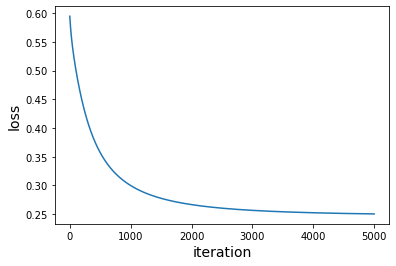

estimated b1 = 1.725 (BETA1 = 0.250)
estimated b2 = -4.273 (BETA2 = -0.725)
estimated a = 3.002 (BIAS = 0.500)


In [38]:
plt.figure()
plt.plot(list_loss)
# plt.xticks(np.arange(0, 25, 5))
plt.xlabel("iteration", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.show()

print("estimated b1 = %.3f (BETA1 = %.3f)" %(b1, BETA1))
print("estimated b2 = %.3f (BETA2 = %.3f)" %(b2, BETA2))
print("estimated a = %.3f (BIAS = %.3f)" %(a, BIAS))

In [39]:
# calculate accuracy
z_pred = z_pred >= 0.5 # boolean: True or False
z_pred = tf.cast(z_pred, tf.float32) # conversion to int: 1 or 0

In [40]:
z_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)>

In [41]:
n_correct = tf.reduce_mean(tf.cast(z==z_pred, tf.float32))
print(n_correct)

tf.Tensor(0.891, shape=(), dtype=float32)
